Instalación de librerías

In [1]:
!pip install opencv-python

!apt-get update && apt-get install -y libgl1-mesa-glx -q
!apt-get install -y libglib2.0-0 -q
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 18.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [27.2 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 http://deb.debian.org/debian bullseye/main amd64 Packages [8,066 kB]
Get:5 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [363 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [18.8 kB]
Fetched 8,635 kB in 3s (2,756 kB/s)

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libllvm11 lib

# Clase 15-4

## Librerías generales

In [2]:
import matplotlib.pyplot as plt  # Para visualización
import numpy as np


## PIL Image

In [3]:
# !wget = "https://upload.wikimedia.org/wikipedia/commons/e/ed/Ara_macao_-on_a_small_bicycle-8.jpg" -O macao.jpg

## Librerias

In [4]:
from PIL import Image  # Importar la clase Image

## Funciones auxiliares

In [5]:
def propiedades_imagen_pil(im):
    print(f"""
    Ancho: {im.width} píxeles
    Alto: {im.height} píxeles
    Modo: {im.mode} (RGB, L=Escala de grises, etc.)
    Formato: {im.format}
    Tipo de objeto: {type(im)}
    """)

def propiedades_imagen_mplot(im):
    print(f"""
    Dimensiones (alto, ancho, canales): {im.shape}
    Tipo de dato: {im.dtype}
    Tipo de objeto: {type(im)}
    """)

def visualizar_imagen(im, titulo=None, gama=None):
    plt.figure(figsize=(8, 6))
    plt.imshow(im, cmap=gama)
    plt.axis('off')  # Ocultar ejes
    plt.title(titulo)
    plt.show()

def comparar_imagenes(img1, img2, titulo1=None, titulo2=None):
    # Mostrar ambas imágenes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img1); axes[0].set_title(titulo1); axes[0].axis('off')
    axes[1].imshow(img2, cmap='gray'); axes[1].set_title(titulo2); axes[1].axis('off')
    plt.show()

## Propiedades de la imagen

In [6]:
im = Image.open('macao.jpg')
propiedades_imagen_pil(im)


    Ancho: 1000 píxeles
    Alto: 663 píxeles
    Modo: RGB (RGB, L=Escala de grises, etc.)
    Formato: JPEG
    Tipo de objeto: <class 'PIL.JpegImagePlugin.JpegImageFile'>
    


## Visualizar imagen

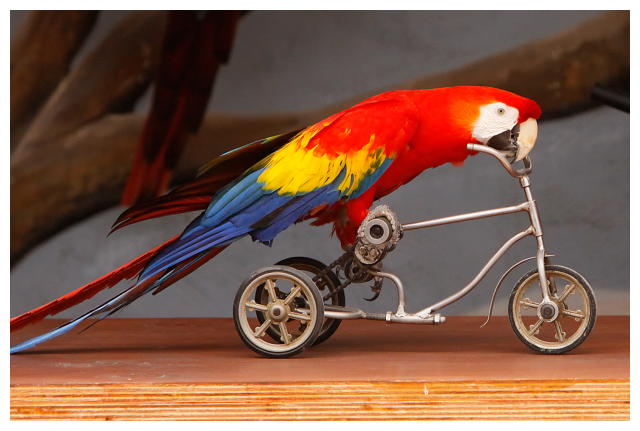

In [7]:
visualizar_imagen(im)

## Convertir a escala de grises

In [8]:
im_gris = im.convert('L')  # 'L' = Escala de grises

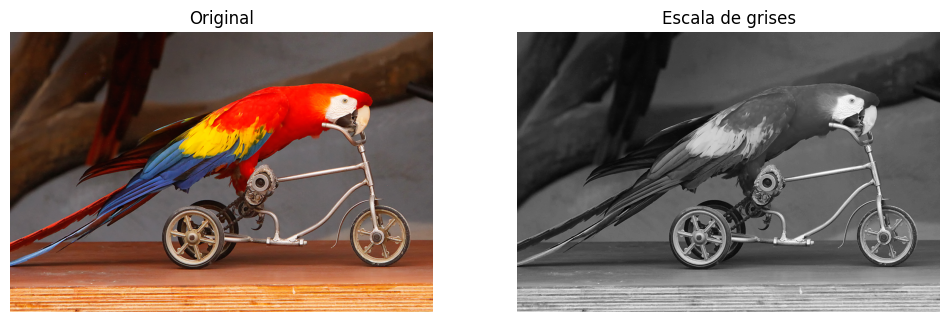

In [9]:
comparar_imagenes(im, im_gris, 'Original', 'Escala de grises')

## Guardar imagen

In [10]:
im_gris.save("parrot_gris.jpg")

## Datos de PIL

Image.open(): Carga la imagen en un objeto PIL.Image.

Modos de imagen:

    'RGB': 3 canales (Red, Green, Blue).

    'L': Escala de grises (Luminance).

    '1': Binario (blanco/negro).

Guardado: Usar im.save("nombre.ext") (soporta PNG, JPEG, etc.).

## Lectura, Guardado y Visualización de Imágenes con Matplotlib

In [11]:
import matplotlib.image as mpimg

In [12]:
#!wget 'https://upload.wikimedia.org/wikipedia/commons/c/c8/Perito_Moreno_Glacier_2023.jpg' -O perito_moreno.jpg

In [13]:
im_perito = mpimg.imread('perito_moreno.jpg')

## Propiedades de la Imagen

Matplotlib carga la imagen como un array NumPy con valores normalizados (float32 entre 0 y 1):

In [14]:
propiedades_imagen_mplot(im_perito)


    Dimensiones (alto, ancho, canales): (5621, 13117, 3)
    Tipo de dato: uint8
    Tipo de objeto: <class 'numpy.ndarray'>
    


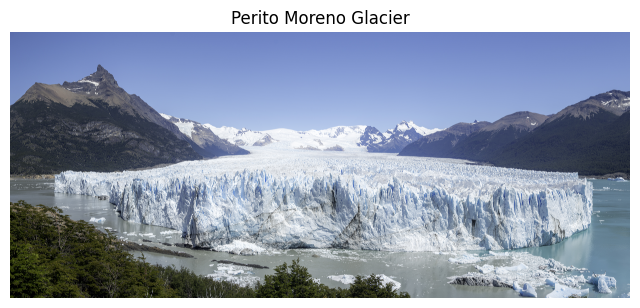

In [15]:
visualizar_imagen(im_perito, 'Perito Moreno Glacier')

## Convertir y Guardar la Imagen

Ejemplo: Convertir a escala de grises y guardar:

In [16]:
# Convertir a grises (promedio de canales RGB, ignorando canal alfa)
im_gris = np.mean(im_perito[:, :, :3], axis=2)  # Canales R+G+B / 3

In [17]:
# Guardar con matplotlib (normalizar a 0-255 si es necesario)
# plt.imsave("hill_gris.png", im_gris, cmap='gray')  # Guardar en Colab

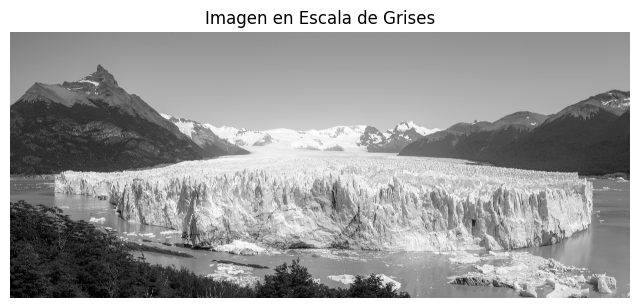

In [18]:
visualizar_imagen(im_gris, 'Imagen en Escala de Grises', gama='gray')

## Interpolación en Visualización con matplotlib.imshow()

Explorar métodos de interpolación al visualizar imágenes pequeñas para entender cómo afectan la calidad aparente.

In [19]:
# !wget = 'https://upload.wikimedia.org/wikipedia/commons/9/9e/House_Sparrow_%28M%29_I_IMG_7881.jpg' -O house_sparrow.jpg
# !wget 'https://upload.wikimedia.org/wikipedia/commons/a/a2/Mineral-img_0263.jpg' -O mineral.jpg
# !wget 'https://upload.wikimedia.org/wikipedia/commons/1/14/Comparison_of_Volcan_Tunupa_%28Oruro%29%2C_Salar_de_Uyuni%2C_being_hidden_by_Earth%27s_curvature_2.jpg' -O volcan_tunupa.jpg
# !wget 'https://upload.wikimedia.org/wikipedia/commons/9/94/Containerfrachter_hinter_dem_Horizont.jpg' -O playa.jpg
# !wget 'https://upload.wikimedia.org/wikipedia/commons/9/9d/Gekr%C3%BCmmte_Fl%C3%A4che_%28Globus%29.jpg' -O globo_tierra.jpg
# !wget 'https://upload.wikimedia.org/wikipedia/commons/4/4a/Meteor_Burst_SNOTEL.jpg' -O snotel.jpg

### Verificar tamaño:

In [20]:
# imagen = 'mineral.jpg'
# imagen = 'volcan_tunupa.jpg'
# imagen = 'playa.jpg'
# imagen = "globo_tierra.jpg"
imagen = "snotel.jpg"
# imagen = 'house_sparrow.jpg'
im = mpimg.imread(imagen)
print("Dimensiones de la imagen:", im.shape)  # Debería ser pequeña (ej. 50x50)

Dimensiones de la imagen: (400, 590, 3)


## Visualizar con Diferentes Métodos de Interpolación

Lista de métodos disponibles:

In [21]:
metodos = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

### Código para comparar métodos:

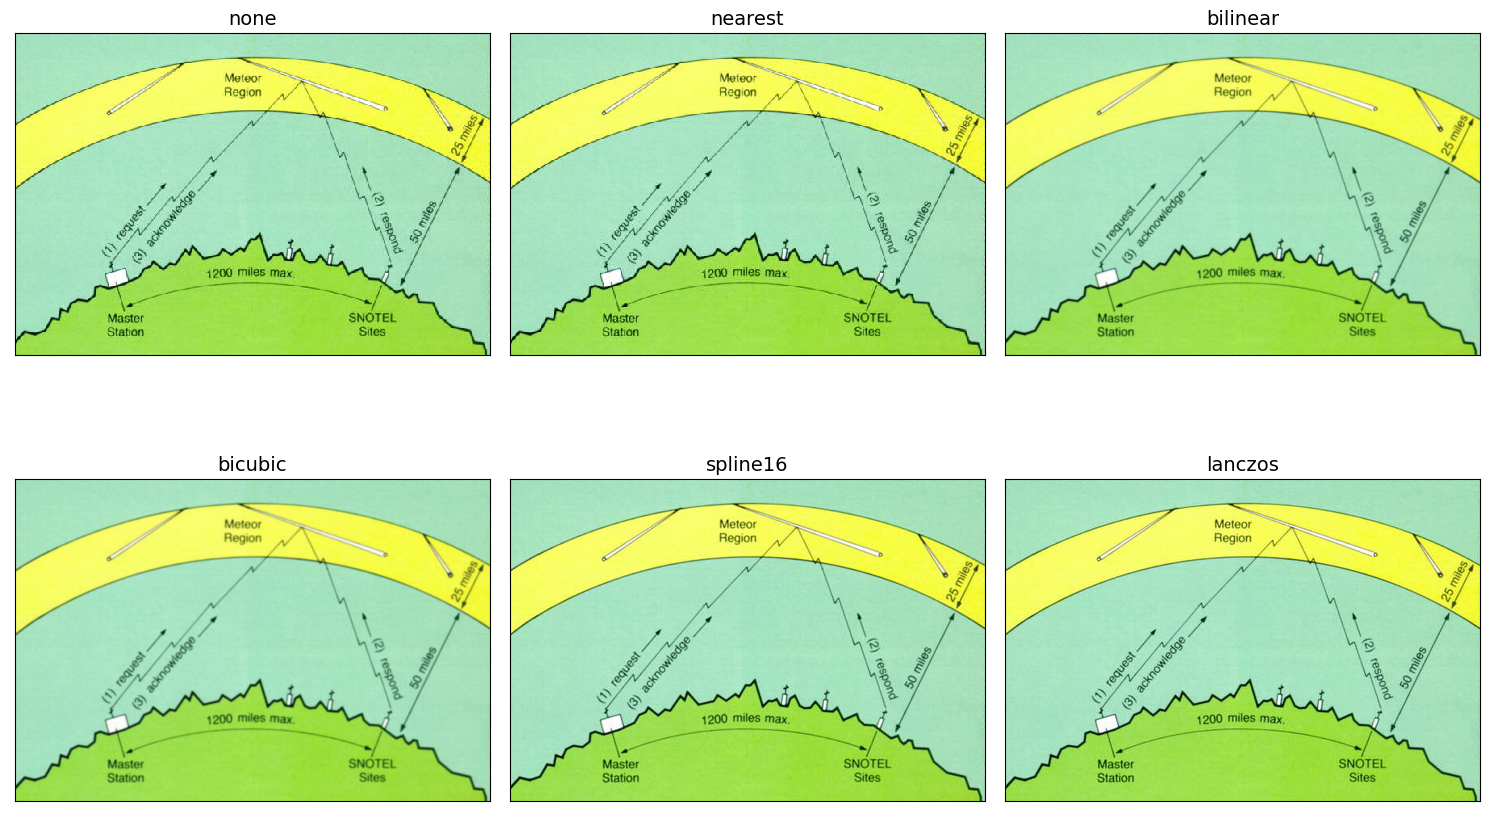

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.1, wspace=0.1)
img = im.copy()
for ax, metodo in zip(axes.flat, metodos):
    ax.imshow(img, interpolation=metodo)
    ax.set_title(metodo, fontsize=14)
plt.tight_layout()
plt.show()

Métodos de interpolación en matplotlib.imshow():
| Método | Descripción | Uso Típico |
|--------|-------------|------------|
| 'none' | Sin interpolación (píxeles bloqueados). | Imágenes pixeladas. |  
| 'nearest' | Interpolación por vecino más cercano (rápido, bajo costo computacional). | Gráficos simples. |
| 'bilinear' | Interpolación lineal en una cuadrícula 2x2. | Balance calidad-velocidad. |
| 'bicubic' | Interpolación cúbica en una cuadrícula 4x4 (mejor calidad que bilinear). | Fotografías. |
| 'spline16' | Interpolación spline de orden 16. | Alta calidad (lento). |
| 'lanczos' | Interpolación con filtro Lanczos (alta calidad, antialiasing). | Detalle fino (ej. astronomía). |

nearest (Vecino más cercano) → Asigna a cada nuevo píxel el valor del píxel más cercano. Es rápido, pero puede generar bordes duros y un efecto de bloques.

bilinear → Usa una interpolación lineal entre los píxeles más cercanos. Suaviza la imagen y reduce el efecto de bloques, pero puede perder algo de nitidez.

bicubic → Utiliza un cálculo más complejo basado en curvas cúbicas para obtener transiciones más suaves que la bilineal. Mejor calidad, pero más costoso en términos computacionales.

spline16 → Usa interpolación basada en splines (curvas suaves), similar a bicubic, pero optimizado con un kernel de tamaño específico (orden 16).

lanczos → Usa una ventana de sinc truncada para ofrecer resultados muy suaves y detallados. Es ideal para escalado de imágenes con alta calidad, aunque más lento.

# Ski image y scipy

Objetivo manipular imagenes usando scipy y skiimage

In [61]:
!pip install scikit-image scipy --quiet
from skimage import io, color, data
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Lectura y visualización de imágenes

usando scikit image

In [24]:
im = data.astronaut()
print("Tipo:", type(im), "Dimensiones:", im.shape, "Rango de valores:", im.dtype)

Tipo: <class 'numpy.ndarray'> Dimensiones: (512, 512, 3) Rango de valores: uint8


## Visualizar

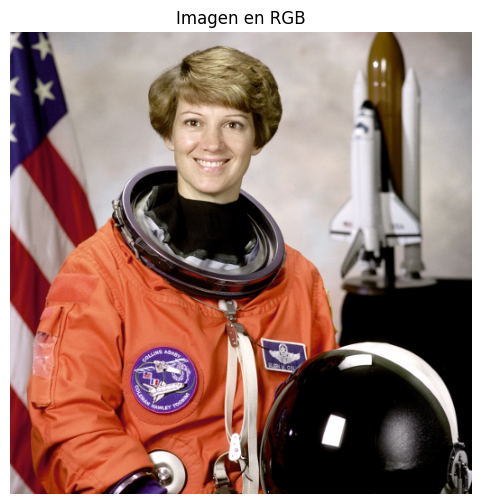

In [25]:
visualizar_imagen(im, 'Imagen en RGB')

### misc.face Versión obsoleta

In [49]:
# im = misc.face()
# plt.imshow(im), plt.axis('off'), plt.show()

In [52]:
!wget https://upload.wikimedia.org/wikipedia/commons/1/1a/Sonora_Desert_Museum_Tuscon_Arizona_-_panoramio_%289%29.jpg -O fuente.jpg

--2025-05-07 18:34:03--  https://upload.wikimedia.org/wikipedia/commons/1/1a/Sonora_Desert_Museum_Tuscon_Arizona_-_panoramio_%289%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3615198 (3.4M) [image/jpeg]
Saving to: ‘fuente.jpg’

fuente.jpg          100%[===================>]   3.45M  --.-KB/s    in 0.1s    

2025-05-07 18:34:03 (24.5 MB/s) - ‘fuente.jpg’ saved [3615198/3615198]



In [ ]:
im = io.imread('fuente.jpg')
visualizar_imagen(im, 'Fuente en RGB')

## Convertir por espacios de color

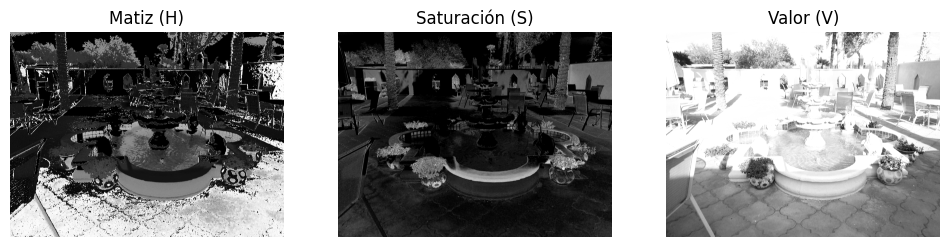

In [64]:
im_hsv = color.rgb2hsv(im)
# Visualizar canales por separado
plt.figure(figsize=(12, 4))
canales = ['Matiz (H)', 'Saturación (S)', 'Valor (V)']
for i in range(3):
   plt.subplot(1, 3, i+1)
   plt.imshow(im_hsv[:, :, i], cmap='gray')
   plt.title(canales[i])
   plt.axis('off')
plt.show()

## Modificar saturación

In [ ]:
im_hsv_mod = im_hsv.copy()
im_hsv_mod[:, :, 1] = 0.5  # Ajustar saturación al 50%
im_rgb_mod = color.hsv2rgb(im_hsv_mod)  # Volver a RGB

plt.imshow(im_rgb_mod)
plt.title("HSV con Saturación Ajustada")
plt.axis('off')
plt.show()

### 4. Manipulación de Formatos y Tipos de Imagen

In [ ]:
# A. Convertir entre Formatos (PNG → JPG)
# Usando PIL (para manejar modos como RGBA)
im_pil = Image.fromarray(im)
im_pil.save("imagen.jpg")  # Conversión automática a RGB si es RGBA
files.download("imagen.jpg")


### Convertir a Escala de Grises

In [ ]:
# B. Convertir a Escala de Grises
im_gris = color.rgb2gray(im)  # scikit-image (rango 0-1)
print("Shape:", im_gris.shape)  # (alto, ancho)

# Mostrar
plt.imshow(im_gris, cmap='gray')
plt.title("Escala de Grises (float64)")
plt.axis('off')
plt.show()

## Ejercicio 1

¿Qué pasa si convertimos una imagen RGB a escala de grises usando solo el canal rojo (im[:, :, 0])? Comparar con rgb2gray.

In [ ]:
im_gris_rojo = im[:, :, 0]  # Solo canal R
plt.imshow(im_gris_rojo, cmap='gray')
plt.title("Grises usando Canal Rojo")
plt.axis('off')
plt.show()

## 6. Estructuras de Datos y Conversiones

 A. De PIL a NumPy (y viceversa)

In [ ]:
im_pil = Image.open("playa.jpg")
im_np = np.array(im_pil)

# Nimpy --> PIL
im_pil = Image.fromarray(im_np)

## 7. Resumen de funciones clave

In [ ]:
import pandas as pd
from IPython.display import display

# Crear un DataFrame con la información de la tabla
operaciones_imagenes = pd.DataFrame({
    'Operación': ['Leer imagen', 'RGB a HSV', 'Escala de grises', 'Guardar imagen', 'Visualizar múltiples imágenes'],
    'Función': ['io.imread()', 'color.rgb2hsv()', 'color.rgb2gray()', 'Image.save()', 'io.imshow_collection()'],
    'Biblioteca': ['scikit-image', 'scikit-image', 'scikit-image', 'PIL', 'scikit-image']
})

# Mostrar la tabla con un estilo mejorado
display(operaciones_imagenes.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid gray',
    'padding': '8px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]
}]))

# Ski image

Uso de la libreria ski-image

In [26]:
# Importar bibliotecas necesarias
from skimage import data

## Muestreo y cuantización

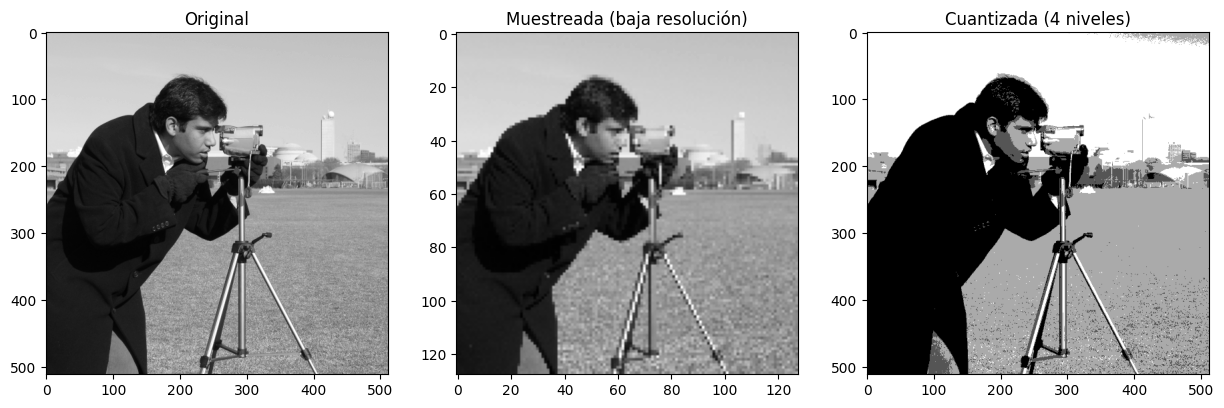

In [27]:
# Cargar imagen de ejemplo (ej. 'camera' de skimage)
imagen = data.camera()

# Reducción de resolución (muestreo)
imagen_muestreada = imagen[::4, ::4]  # Submuestreo cada 4 píxeles

# Reducción de niveles de color (cuantificación)
imagen_cuantizada = (imagen // 64) * 64  # Reducción a 4 niveles (8 bits -> 2 bits)

# Visualización
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(imagen, cmap='gray'); ax[0].set_title("Original")
ax[1].imshow(imagen_muestreada, cmap='gray'); ax[1].set_title("Muestreada (baja resolución)")
ax[2].imshow(imagen_cuantizada, cmap='gray'); ax[2].set_title("Cuantizada (4 niveles)")
plt.show()

Guardar imagenes

In [28]:
# Guardar en diferentes formatos
# Image.fromarray(imagen).save("imagen.png")  # Sin pérdida
# Image.fromarray(imagen).save("imagen.jpg", quality=30)  # Con pérdida (baja calidad)

In [29]:
# !wget 'https://upload.wikimedia.org/wikipedia/commons/6/6f/Pavo_Real_Venezolano.jpg' -O pavo_real.jpg

## Paleta de colores

In [30]:
# Mostrar paleta de colores (ejemplo con imagen indexada)
imagen_paleta = Image.open("pavo_real.jpg")
imagen_paleta = imagen_paleta.convert("P", palette=Image.ADAPTIVE, colors=256)
paleta = imagen_paleta.getpalette()
print("Paleta:", imagen_paleta.getpalette())  # Lista de colores RGB

Paleta: [255, 236, 212, 255, 234, 210, 254, 233, 206, 254, 229, 202, 238, 232, 224, 251, 225, 197, 250, 222, 194, 250, 221, 189, 250, 220, 186, 241, 221, 198, 249, 218, 186, 249, 217, 181, 244, 217, 188, 246, 214, 182, 242, 210, 182, 246, 212, 178, 242, 209, 177, 241, 207, 177, 244, 210, 174, 241, 206, 173, 244, 209, 169, 242, 205, 170, 243, 205, 163, 230, 207, 184, 238, 202, 170, 239, 201, 165, 238, 199, 162, 234, 198, 164, 238, 198, 156, 234, 194, 158, 234, 193, 153, 219, 194, 170, 227, 191, 157, 228, 190, 154, 250, 199, 145, 246, 194, 138, 244, 190, 134, 234, 194, 148, 231, 189, 147, 212, 191, 145, 213, 192, 129, 229, 186, 147, 226, 186, 150, 226, 185, 144, 225, 182, 145, 222, 182, 147, 221, 178, 143, 212, 181, 149, 215, 177, 141, 236, 184, 128, 234, 176, 122, 223, 180, 134, 223, 174, 119, 218, 179, 134, 217, 173, 135, 210, 181, 127, 212, 173, 132, 213, 170, 137, 213, 169, 134, 210, 168, 133, 213, 168, 130, 210, 165, 130, 206, 166, 132, 216, 167, 119, 206, 167, 122, 207, 163, 129, 2

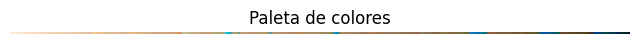

In [31]:
# Crea una imagen con la paleta
paleta_imagen = np.array(paleta).reshape(-1, 3)
paleta_imagen = paleta_imagen[np.newaxis, :, :]  # Agrega una dimensión extra

# Muestra la imagen
visualizar_imagen(paleta_imagen, 'Paleta de colores')


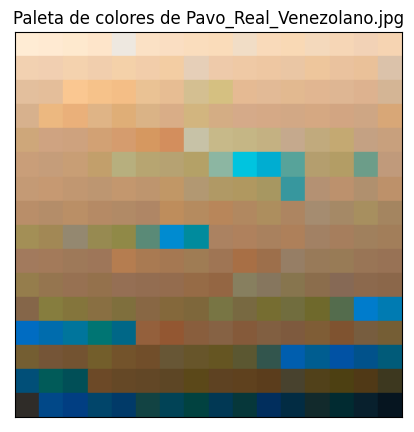

In [32]:
# Convertir la paleta a una matriz NumPy
paleta_array = np.array(paleta).reshape(-1, 3)

# Calcular dimensiones de la cuadrícula (ajusta según la cantidad de colores)
num_colores = paleta_array.shape[0]
filas = int(num_colores**0.5)  # Raíz cuadrada para una cuadrícula cuadrada
columnas = int(np.ceil(num_colores / filas))

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(5, 5))  # Ajusta el tamaño según sea necesario

# Iterar sobre los colores y crear cuadrados en la cuadrícula
for i, color in enumerate(paleta_array):
    fila = i // columnas
    columna = i % columnas
    # Crea un rectángulo con el color actual
    rect = plt.Rectangle((columna, fila), 1, 1, color=color / 255)  # Normaliza color a 0-1
    ax.add_patch(rect)

# Configurar la visualización
ax.set_xlim(0, columnas)
ax.set_ylim(0, filas)
ax.set_xticks([])  # Oculta las marcas de los ejes
ax.set_yticks([])
ax.invert_yaxis()  # Invierte el eje y para que el primer color esté arriba
plt.title("Paleta de colores de Pavo_Real_Venezolano.jpg")
plt.show()

Brillo: 129.06, Contraste: 73.64


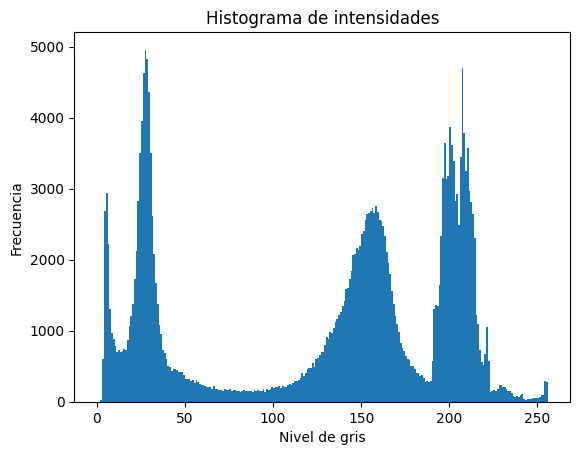

In [33]:
# Cálculo de brillo y contraste
brillo = np.mean(imagen)
contraste = np.std(imagen)
print(f"Brillo: {brillo:.2f}, Contraste: {contraste:.2f}")

# Histograma
plt.hist(imagen.ravel(), bins=256, range=(0, 256))
plt.title("Histograma de intensidades")
plt.xlabel("Nivel de gris"); plt.ylabel("Frecuencia")
plt.show()

In [34]:
imagen = data.coffee()

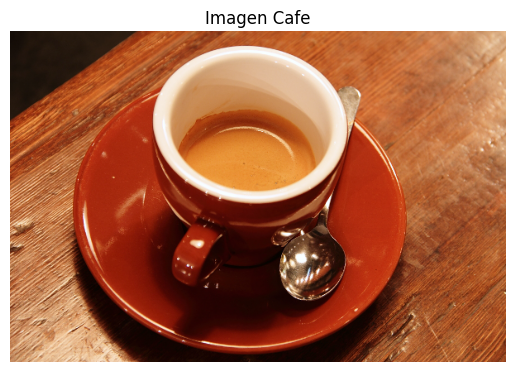

In [35]:
plt.imshow(imagen)
plt.axis('off')
plt.title("Imagen Cafe")
plt.show()

In [36]:
images = {
    "Camera": data.camera(),
    "Moon": data.moon(),
    "Text": data.text(),
    "Coins": data.coins(),
    "Coffe": data.coffee()
}

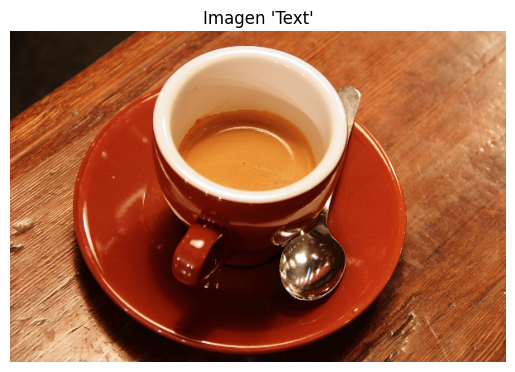

In [37]:
plt.imshow(images["Coffe"])
plt.axis('off')
plt.title("Imagen 'Text'")
plt.show()

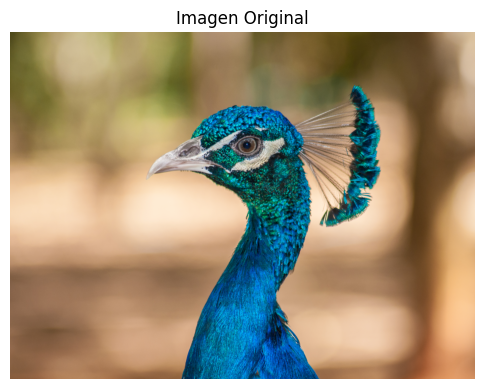

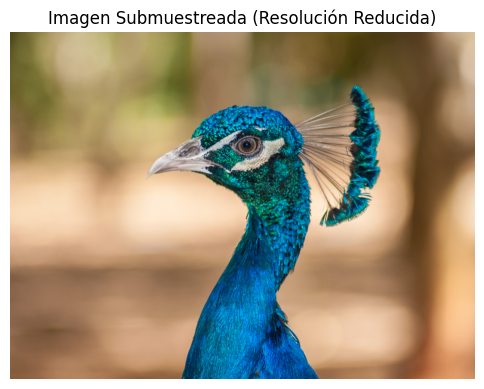

In [38]:
# Cargar una imagen de ejemplo
imagen = Image.open('pavo_real.jpg') # Reemplazar con tu imagen

# Convertir la imagen a una matriz NumPy
imagen_np = np.array(imagen)

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(imagen_np)
plt.title("Imagen Original")
plt.axis('off') # Para no mostrar los ejes

# Reducir la resolución (submuestreo)
factor_reduccion = 2  # Reducir a la mitad
nueva_altura = imagen_np.shape[0] // factor_reduccion
nuevo_ancho = imagen_np.shape[1] // factor_reduccion

imagen_submuestreada = Image.fromarray(imagen_np).resize((nuevo_ancho, nueva_altura))
imagen_submuestreada_np = np.array(imagen_submuestreada)

# Mostrar la imagen submuestreada
plt.figure(figsize=(6, 6))
plt.imshow(imagen_submuestreada_np)
plt.title("Imagen Submuestreada (Resolución Reducida)")
plt.axis('off')
plt.show()

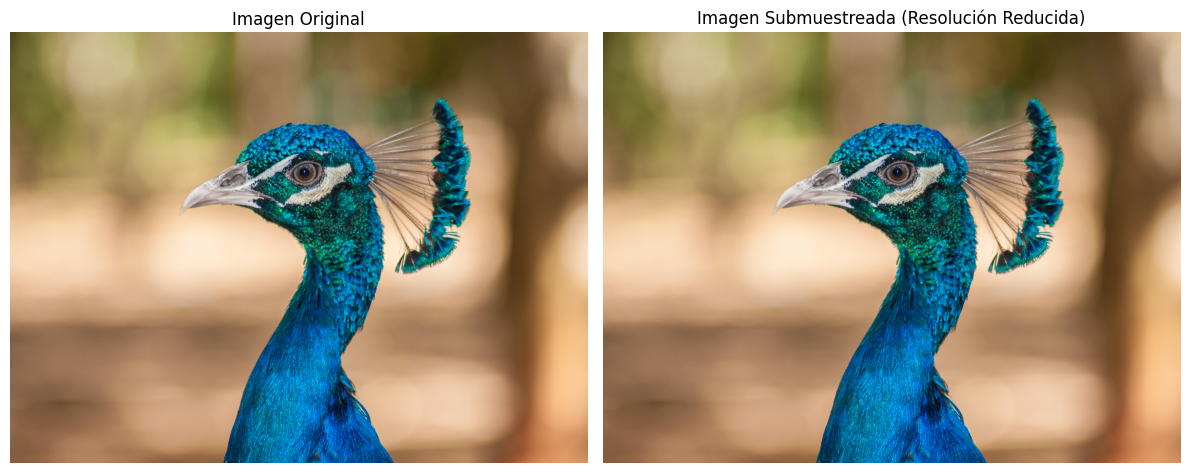

In [39]:
# Crear una figura con dos subplots horizontales (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta figsize según sea necesario

# Mostrar la imagen original en el primer subplot
axes[0].imshow(imagen_np)
axes[0].set_title("Imagen Original")
axes[0].axis('off')

# Mostrar la imagen submuestreada en el segundo subplot
axes[1].imshow(imagen_submuestreada_np) # Aqui fue donde se cambio
axes[1].set_title("Imagen Submuestreada (Resolución Reducida)")
axes[1].axis('off')

# Ajustar el espacio entre los subplots (opcional)
plt.tight_layout()

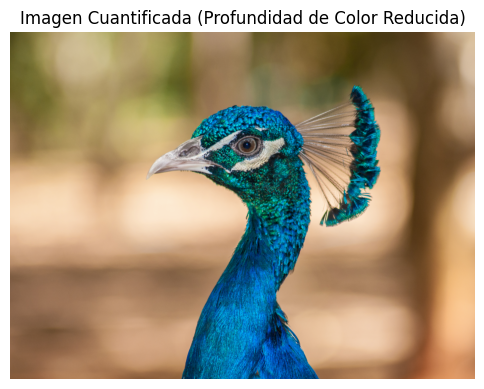

In [40]:
# Reducir la profundidad de color (cuantificación)
profundidad_color_reducida = 64 # Ejemplo: 64 niveles de gris

imagen_cuantificada = imagen_np // (256 // profundidad_color_reducida) * (256 // profundidad_color_reducida)

# Mostrar la imagen cuantificada
plt.figure(figsize=(6, 6))
plt.imshow(imagen_cuantificada, cmap='gray', vmin=0, vmax=255) # cmap='gray' para escala de grises
plt.title("Imagen Cuantificada (Profundidad de Color Reducida)")
plt.axis('off')
plt.show()

In [41]:
im = Image.open('pavo_real.jpg')


In [42]:
print(im.width, im.height, im.mode, im.format, type(im))


3819 2848 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


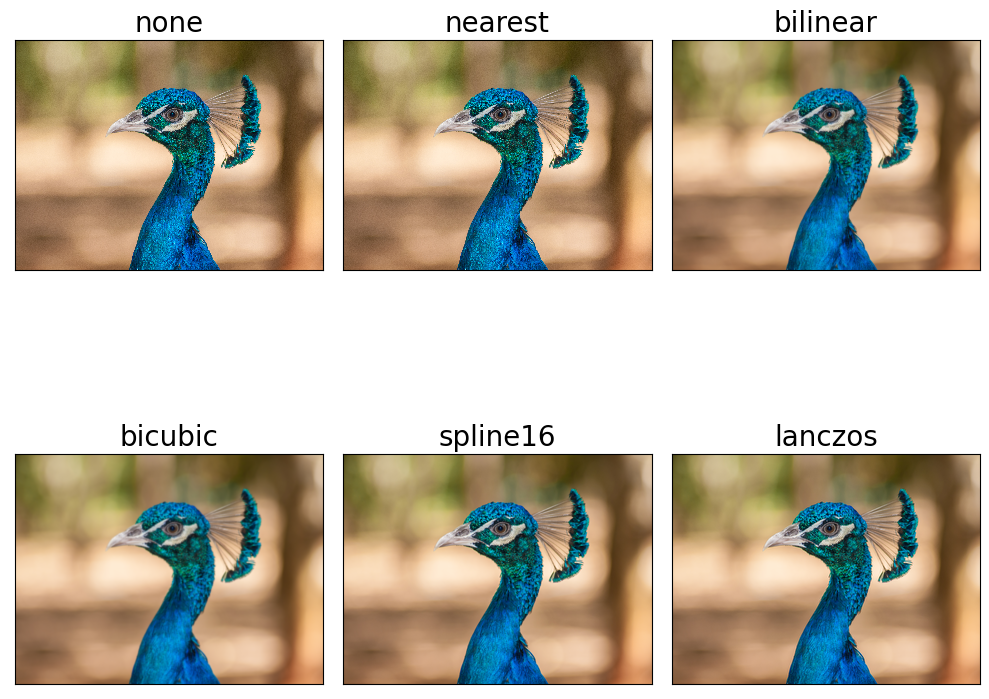

In [43]:
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for ax, interp_method in zip(axes.flat, methods):
 ax.imshow(im, interpolation=interp_method)
 ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

# 29-05